In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
versions = np.array(["100", "80", "74", "7", "GAFF"])

Temp_state_point = np.array([243.15, 258.15, 273.15, 298.15])
Temp_statepoint_id = np.array(["243", "258", "273", "298"])

file_ID = np.array(["1", "2", "3"])


In [3]:
Self_Diff_array = np.zeros((len(file_ID), len(versions), len(Temp_statepoint_id)))

In [4]:
for i in range(len(file_ID)):
    for j in range(len(versions)):
        for k in range(len(Temp_statepoint_id)):
            T = Temp_statepoint_id
            Ver = versions
            openfile = open(f"R125_v{Ver[j]}_1000mol_nptBridgman_{T[k]}K_{T[k]}P_realstate_Diff_RDF_{file_ID[i]}.json")
            dictionary = json.load(openfile)
            dict_items = dictionary.items()
            list_dictionary = list(dict_items)
            Diffusivity_data = (((list_dictionary[0][1])))
            Diffusivity_data = list(Diffusivity_data.items())
            Diffusivity_sim = Diffusivity_data[0][1]
            Self_Diff_array[i,j,k] = Diffusivity_sim


            

RDF_T = 273
RDF_test_len = 500
RDF_array = np.zeros((len(versions), RDF_test_len))
Distance_array = np.zeros((len(versions), RDF_test_len))

for l in range(len(versions)):
        openfile = open(f"R125_v{versions[l]}_1000mol_nptBridgman_{RDF_T}K_{RDF_T}P_realstate_Diff_RDF_1.json")
        dictionary = json.load(openfile)
        dict_items = dictionary.items()
        list_dictionary = list(dict_items)
        RDF_data = (((list_dictionary[2][1])))
        RDF_data = list(RDF_data.items())
        Radial_dist = RDF_data[0][1]
        distance = RDF_data[1][1]
        RDF_data_len = len(Radial_dist)
        RDF_array[l,0:RDF_data_len] = Radial_dist
        Distance_array[l,0:RDF_data_len] = distance



In [5]:
Distance_array_1 = [k for k in Distance_array[0,:] if k != 0]
RDF_array_1 = np.concatenate([RDF_array[0 , 0:100] , [k for k in RDF_array[0, 100:] if k != 0]])


Distance_array_2 = [k for k in Distance_array[1,:] if k != 0]
RDF_array_2 = np.concatenate([RDF_array[1 , 0:100] , [k for k in RDF_array[1, 100:] if k != 0]])

Distance_array_3 = [k for k in Distance_array[2,:] if k != 0]
RDF_array_3 = np.concatenate([RDF_array[2 , 0:100] , [k for k in RDF_array[2, 100:] if k != 0]])

Distance_array_4 = [k for k in Distance_array[3,:] if k != 0]
RDF_array_4 = np.concatenate([RDF_array[3 , 0:100] , [k for k in RDF_array[3, 100:] if k != 0]])

Distance_array_5 = [k for k in Distance_array[4,:] if k != 0]
RDF_array_5 = np.concatenate([RDF_array[4 , 0:100] , [k for k in RDF_array[4, 100:] if k != 0]])


In [6]:
Distance_data_all = np.array([ Distance_array_1 , Distance_array_2, Distance_array_3, \
                    Distance_array_4, Distance_array_5], dtype=object)

RDF_data_all = np.array([ RDF_array_1 , RDF_array_2, RDF_array_3, \
                    RDF_array_4, RDF_array_5], dtype=object)

In [7]:
Diff_MD = np.mean(Self_Diff_array, axis=0)
Diff_MD_error = np.std(Self_Diff_array, axis=0)

In [8]:
kb_si = 1.380649e-23
corr_factor = 2.837298

viscosity = np.loadtxt("R125_viscosity.txt")
viscosity_error = np.loadtxt("R125_viscosity_error.txt")
length = np.loadtxt("R125_Lengths.txt")
length_error = np.loadtxt("R125_Lengths_error.txt")



correction_term = ((kb_si*Temp_state_point*corr_factor)/(6*(22/7)*viscosity*length))
Diff_corrected = Diff_MD + correction_term

Diff_corrected_error = Diff_MD_error + correction_term*(length_error/length + viscosity_error/viscosity)

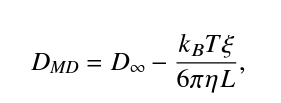

In [9]:
print(Diff_MD)

print(Diff_corrected)

[[3.18321904e-09 4.09215432e-09 5.32829802e-09 7.31251985e-09]
 [3.17131293e-09 4.09909699e-09 5.00100700e-09 7.44080053e-09]
 [3.40838960e-09 4.25107217e-09 5.32337928e-09 7.62902270e-09]
 [3.08658140e-09 4.07598324e-09 4.93929364e-09 7.31406484e-09]
 [2.52039427e-09 3.32739525e-09 3.95934427e-09 5.56690877e-09]]
[[3.51513053e-09 4.52029226e-09 5.88251398e-09 8.11196612e-09]
 [3.50936020e-09 4.53264687e-09 5.54881021e-09 8.27080417e-09]
 [3.74735673e-09 4.68945204e-09 5.86545521e-09 8.43346976e-09]
 [3.42443227e-09 4.50863061e-09 5.47181786e-09 8.10706522e-09]
 [2.78039085e-09 3.66300153e-09 4.35835947e-09 6.16065444e-09]]


In [10]:
print(Diff_corrected_error)

[[9.58831850e-11 2.05468652e-10 1.27603212e-10 4.29597555e-11]
 [1.07346624e-10 1.16884177e-10 2.03632488e-10 1.09789321e-10]
 [1.32537686e-10 2.71950756e-10 3.02206778e-10 3.23327828e-11]
 [6.30410168e-11 7.61051963e-11 1.55778437e-10 5.63714381e-11]
 [1.54893803e-10 4.96572338e-11 2.37572239e-10 1.54764807e-10]]


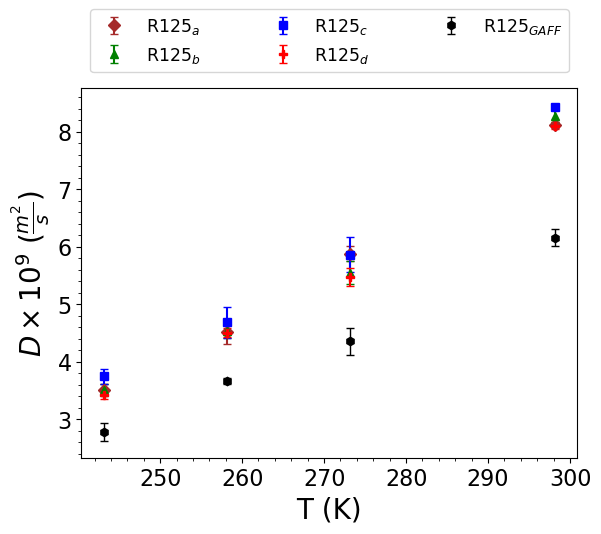

In [11]:
fig, ax = plt.subplots()

ax.errorbar(Temp_state_point, Diff_corrected[0,:]*1e9, yerr = Diff_corrected_error[0,:]*1e9, fmt='D',ecolor = 'brown',color='brown', label = 'R125$_{a}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[1,:]*1e9, yerr = Diff_corrected_error[1,:]*1e9, fmt='^',ecolor = 'green',color='green', label = 'R125$_{b}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[2,:]*1e9, yerr = Diff_corrected_error[2,:]*1e9, fmt='s',ecolor = 'blue',color='blue', label = 'R125$_{c}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[3,:]*1e9, yerr = Diff_corrected_error[3,:]*1e9, fmt='P',ecolor = 'red',color='red', label = 'R125$_{d}$', capsize=3)
ax.errorbar(Temp_state_point, Diff_corrected[4,:]*1e9, yerr = Diff_corrected_error[4,:]*1e9, fmt='h',ecolor = 'black',color='black', elinewidth=1, label = 'R125$_{GAFF}$', capsize=3)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncol=3, fontsize=12.5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.minorticks_on()
plt.xlabel('T (K)', fontsize=20)
plt.ylabel(r'$ D \times 10^9 $' ' ' r'$(\frac{m^2}{s})$', fontsize=20)

plt.savefig("R125_Diffusivity", dpi=1000, bbox_inches='tight')

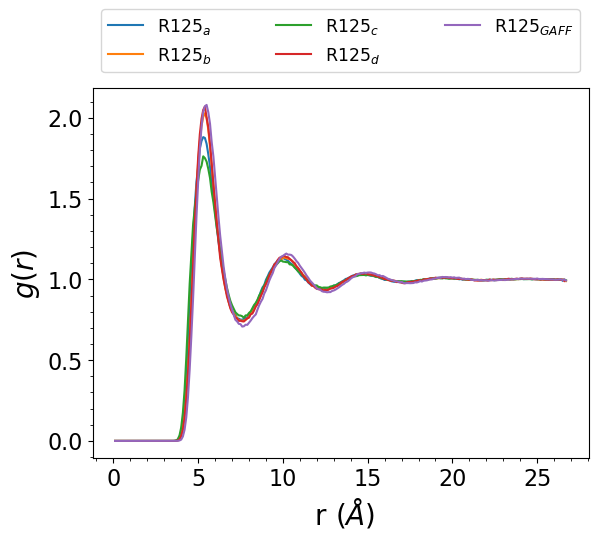

In [12]:
fig, ax = plt.subplots()

ax.plot(list(Distance_data_all)[0], list(RDF_data_all)[0], label = 'R125$_{a}$')
ax.plot(list(Distance_data_all)[1], list(RDF_data_all)[1], label = 'R125$_{b}$')
ax.plot(list(Distance_data_all)[2], list(RDF_data_all)[2], label = 'R125$_{c}$')
ax.plot(list(Distance_data_all)[3], list(RDF_data_all)[3], label = 'R125$_{d}$')
ax.plot(list(Distance_data_all)[4], list(RDF_data_all)[4], label = 'R125$_{GAFF}$')

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncol=3, fontsize=12.5)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.minorticks_on()
plt.xlabel(r' r $(\AA) $', fontsize=20)
plt.ylabel(r'$ g(r) $', fontsize=20)

plt.savefig("R125_RDF", dpi=1000, bbox_inches='tight')

In [13]:
def Create_Latex_Results_Table(sim, sim_error, table_cols, decimal_places, filename):
   
    

    sim_exp = sim.T

    sim_error_exp_error = sim_error.T

    
    result_round_array = np.around(sim_exp, decimal_places)
    formatted_array = np.array([["{:.{}f}".format(num, decimal_places) for num in row] for row in result_round_array])      
    error_round_array = np.around(sim_error_exp_error, decimal_places)
    formatted_array_error = np.array([["{:.{}f}".format(num, decimal_places) for num in row] for row in error_round_array])
    
    
    array1 = formatted_array
    array2 = formatted_array_error

    result_array = []

    # Loop through the arrays and combine corresponding elements with +/-
    for i in range(len(array1)):
        row_result = []
        for j in range(len(array1[i])):
            row_result.append(f" &  {array1[i][j]}  $\pm$ {array2[i][j]}")
        result_array.append(row_result)
        
    T_reshape = np.reshape(Temp_state_point, (len(Temp_state_point), 1))
    result_array_updated = (np.concatenate((T_reshape , result_array), axis=1))


    # Save the result array to a file
    with open(filename, "w") as file:
        for row in result_array_updated:
            file.write("\t".join(row).replace('$\\pm$', '$\pm$') + r'\\' + "\n")
    
    file.close()
    
    return file


Diffusivity_table = Create_Latex_Results_Table(Diff_corrected*1e9, Diff_corrected_error*1e9, 6, 2,\
                                               "R125_Diff_Data_Latex.txt")